<a href="https://colab.research.google.com/github/jhat0353/Titanic-Kaggle-Group/blob/main/Kaggle_Titanic_Exploratory_Data_Analysis_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Kaggle Titanic Challenge](https://www.kaggle.com/c/titanic)



Challenge details ...

# Import Libraries

In [ ]:
#written by Jordan Hatcher

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [ ]:
#written by Jordan Hatcher

In [2]:
#data
url = 'https://drive.google.com/file/d/1KE6xXe9I3S1OGmFKlAq_mwLm_GHfgap8/view?usp=sharing'
dl ='https://drive.google.com/uc?id=' + url.split('/')[-2] # extract the download link
titanic_data = pd.read_csv(dl)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning & Engineering the Data

In [ ]:
#written by Jordan Hatcher

## Cleaning Up Data

In [3]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_data['Cabin'] = titanic_data['Cabin'].fillna('U0')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('U')
titanic_data['Age'] = titanic_data['Age'].fillna(-1.0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [6]:
print(titanic_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
print(titanic_data['Age'].unique())

[22.   38.   26.   35.   -1.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [9]:
titanic_data_engineered = titanic_data

## Feature Engineering

### Getting all the substrings contained in the name

In [10]:
unique_substrings = set()
for text in titanic_data['Name']:
  substrings = text.split(' ')
  for substring in substrings:
    unique_substrings.add(substring)

print(len(unique_substrings))

1674


### Extracting Honorifics

In [ ]:
# create an empty list to store the honorifics
honorifics = []

# iterate through each string in the 'Name' column
for name in titanic_data['Name']:
    # split the name into parts using a comma as the separator
    parts = name.split(',')
    # extract the honorific from the second part (index 1)
    honorific = parts[1].split('.')[0].strip()
    # add the honorific to the list of honorifics
    honorifics.append(honorific)

# create a new column called 'Honorific' and set its values to the honorifics list
titanic_data_engineered['Honorific'] = honorifics

In [ ]:
# print the data frame with the new 'Honorific' column
titanic_data_engineered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
titanic_data_engineered['Honorific'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
titanic_data_engineered['Honorific'].isna().sum()

0

### Extracting Ticket Type and Number

Tabled for now, not useful enough to justify work

In [ ]:
#titanic_data_engineered[['Ticket_Type', 'Ticket_Num']] = titanic_data['Ticket'].str.extract(r'^(\D+)?(\d+)$')
#titanic_data_engineered.head()

In [ ]:
#titanic_data_engineered['Ticket_Type'].unique()

### Converting Cabin Number into Deck

In [ ]:
print(titanic_data['Cabin'].unique())

['U0' 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [ ]:
#cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

titanic_data_engineered['Deck'] = titanic_data['Cabin'].str.extract(r'([A-Z])') # just extract the letter
#titanic_data_engineered['Deck']=titanic_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
print(titanic_data_engineered['Deck'].unique())

['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


### Family Dynamics

Family Size

In [ ]:
titanic_data_engineered['Family_Size'] = titanic_data['SibSp']+titanic_data['Parch']+1 # the one is the person
titanic_data_engineered['Family_Size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_Size, dtype: float64

Fare per person

In [ ]:
titanic_data_engineered['Fare_per_Person'] = titanic_data['Fare']/(titanic_data['Family_Size'])
titanic_data_engineered['Fare_per_Person'].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: Fare_per_Person, dtype: float64

In [ ]:
titanic_data_engineered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific,Deck,Family_Size,Fare_per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,Mr,U,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,Miss,U,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,Mr,U,1,8.05000


## Edit Columns

In [ ]:
# drop unneeeded
titanic_data_engineered.drop('Cabin', axis=1, inplace=True)
titanic_data_engineered.drop('Ticket', axis=1, inplace=True)
titanic_data_engineered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Honorific,Deck,Family_Size,Fare_per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,U,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,U,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,C,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,U,1,8.05000


In [ ]:
# df = df.rename(columns={'old_column': 'new_column'})

# Exploratory Analysis

## Graphs and Plots

In [ ]:
#written by Jordan Hatcher

### Plot Numeric Data Against Eachother

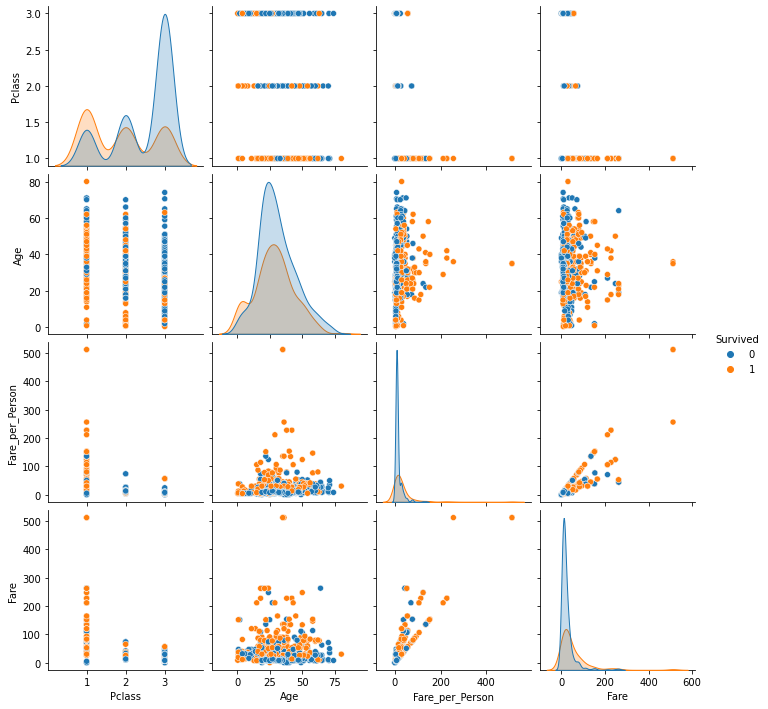

In [ ]:
sns.pairplot(titanic_data_engineered[titanic_data_engineered['Age'] >= 0], vars=['Pclass', 'Age', 'Fare_per_Person','Fare'], hue='Survived')






*   Passenger class 3 is highly associated with death.
*   People who were young and had higher fare were more likely to survive.
*   There seems to be linear fare per person rates based on passenger class (3 distinct categories).




### Age and Sex vs. Survival

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age and Sex by Survival Status')

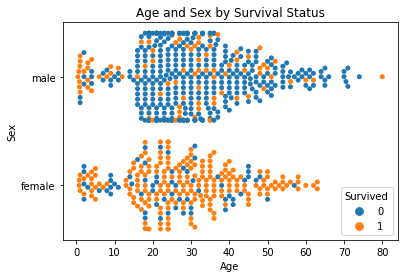

In [ ]:
sns.swarmplot(x='Age', y='Sex', hue='Survived', data=titanic_data_engineered[titanic_data_engineered['Age'] >= 0])
plt.title('Age and Sex by Survival Status')


*   Females were much more likely to survive.
*   As were children below age ~10.
*   There is a distinct group of age 10 girls who died, despite the clear prioritization of the young and the female.
* Very few passengers were in the age 10-16 range.

### Survival Rate by Deck

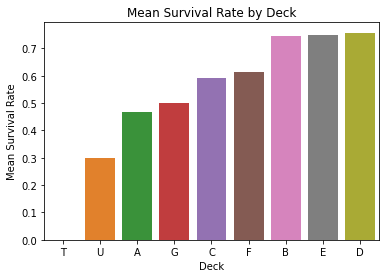

In [ ]:
# Calculate the mean survival rate by Deck
deck_mean_survival = titanic_data_engineered.groupby('Deck')['Survived'].mean().reset_index()

deck_mean_survival = deck_mean_survival.sort_values('Survived', ascending=True)
# Create a barplot using seaborn
sns.barplot(x='Deck', y='Survived', data=deck_mean_survival)

# Add labels and title to the plot
plt.xlabel('Deck')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Deck')
plt.show()

Apparently the T deck was a very bad place to be, and the A deck as well. U is unknown deck and the lack of this information may be related to survival rate.

### Survival Rate by Passenger Class

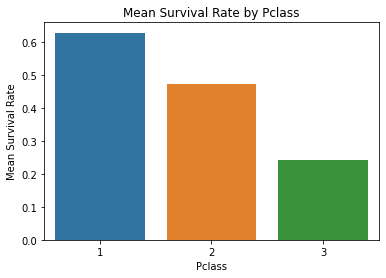

In [ ]:
# Calculate the mean survival rate by Pclass
pclass_mean_survival = titanic_data_engineered.groupby('Pclass')['Survived'].mean().reset_index()

# Create a barplot using seaborn
sns.barplot(x='Pclass', y='Survived', data=pclass_mean_survival)

# Add labels and title to the plot
plt.xlabel('Pclass')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Pclass')
plt.show()

Wealthy passengers were clearly prioritized

### Survival by Honorifics 

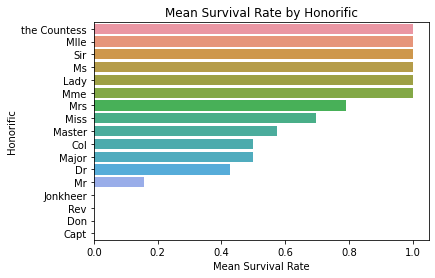

In [ ]:
# Calculate the mean survival rate by Pclass
honorific_mean_survival = titanic_data_engineered.groupby('Honorific')['Survived'].mean().reset_index()

honorific_mean_survival = honorific_mean_survival.sort_values('Survived', ascending=False)

# Create a barplot using seaborn
sns.barplot(x='Survived', y='Honorific', data=honorific_mean_survival)

# Add labels and title to the plot
plt.ylabel('Honorific')
plt.xlabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Honorific')
plt.show()

### Survival by Fare

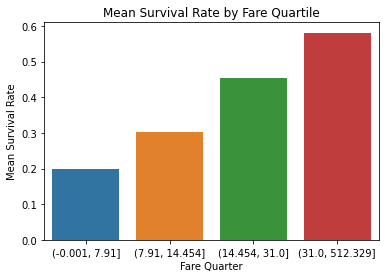

In [ ]:
# Create quarters of Fare using qcut()
titanic_data_engineered['Fare_Quartile'] = pd.qcut(titanic_data['Fare'], q=4)

# Calculate the mean survival rate for each Fare quarter
fare_mean_survival = titanic_data_engineered.groupby('Fare_Quartile')['Survived'].mean().reset_index()

# Create a barplot using seaborn
sns.barplot(x='Fare_Quartile', y='Survived', data=fare_mean_survival)

# Add labels and title to the plot
plt.xlabel('Fare Quarter')
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Fare Quartile')
plt.show()

titanic_data_engineered.drop('Fare_Quartile', axis=1, inplace=True)

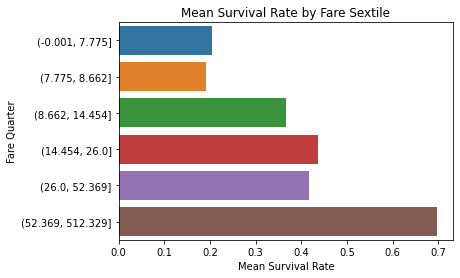

In [ ]:
# Create quarters of Fare using qcut()

titanic_data_engineered['Fare_Sextile'] = pd.qcut(titanic_data_engineered['Fare'], q=6)

# Calculate the mean survival rate for each Fare quarter
fare_mean_survival = titanic_data_engineered.groupby('Fare_Sextile')['Survived'].mean().reset_index()

# Create a barplot using seaborn
sns.barplot(y='Fare_Sextile', x='Survived', data=fare_mean_survival)

# Add labels and title to the plot
plt.ylabel('Fare Quarter')
plt.xlabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Fare Sextile')
plt.show()

titanic_data_engineered.drop('Fare_Sextile', axis=1, inplace=True)

### Survival by Age

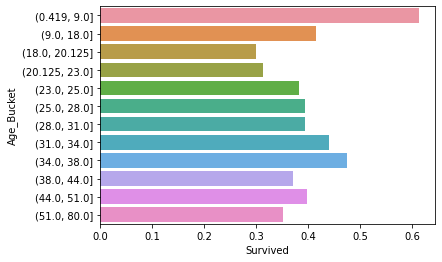

In [ ]:
# Create a new column with Age octtiles
tde_age = titanic_data_engineered[titanic_data_engineered['Age'] >=0]
titanic_data_engineered['Age_Bucket'] = pd.qcut(tde_age['Age'], 12)

# Calculate the mean survival rate for each Fare quarter
age_mean_survival = titanic_data_engineered.groupby('Age_Bucket')['Survived'].mean().reset_index()

sns.barplot(y="Age_Bucket", x="Survived", data=age_mean_survival)

titanic_data_engineered.drop('Age_Bucket', axis=1, inplace=True)

## Dimensionality Reduction Plots

In [ ]:
#written by Jordan Hatcher

In [ ]:
titanic_data_engineered.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Honorific,Deck,Family_Size,Fare_per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,U,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,U,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,C,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,U,1,8.05000


### PCA

Encoding the Data

In [ ]:
# create a mapping dictionary
sex_map = {'male': 1, 'female': 0}

titanic_data_encoded = titanic_data_engineered[['Sex','Age', 'Fare_per_Person', 'Survived', 'Pclass', 'Honorific']]

# use the mapping function to convert the 'Sex' column
titanic_data_encoded['Sex'] = titanic_data_engineered['Sex'].map(sex_map)
#titanic_data_encoded['Sex'] = titanic_data_encoded['Sex'].astype(int)
titanic_data_encoded.head()

<ipython-input-181-ea67352f523f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data_encoded['Sex'] = titanic_data_engineered['Sex'].map(sex_map)


,Sex,Age,Fare_per_Person,Survived,Pclass
0,1,22.0,3.62500,0,3
1,0,38.0,35.64165,1,1
2,0,26.0,7.92500,1,3
3,0,35.0,26.55000,1,1
4,1,35.0,8.05000,0,3


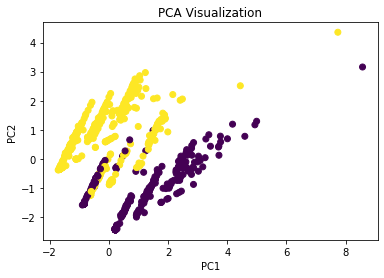

In [ ]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
# standardize the data
scaler = StandardScaler()
titanic_data_std = scaler.fit_transform(titanic_data_encoded)

pca = PCA()

pca = PCA(n_components=2)
pca_data = pca.fit_transform(titanic_data_std)

# create a scatter plot of the PCA results
plt.scatter(pca_data[:,0], pca_data[:,1], c=titanic_data_encoded['Sex'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()


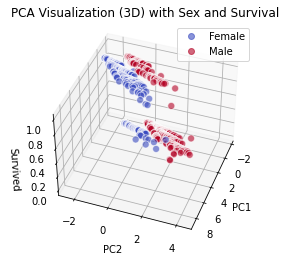

In [ ]:
# create a 3D scatter plot of the PCA results with color-coded points by sex
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:,0], pca_data[:,1], titanic_data_encoded['Survived'], c=titanic_data_encoded['Sex'], cmap='coolwarm', s=50, alpha=0.6, edgecolors='w')
handles, labels = scatter.legend_elements()
ax.legend(handles, ['Female', 'Male'], loc='best')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Survived')
ax.set_title('PCA Visualization (3D) with Sex and Survival')
ax.view_init(elev=40, azim=20)
plt.show()

# CASE

# REMI